# Распределение Парето

https://ru.wikipedia.org/wiki/Распределение_Парето

Теоретическое распределение ${\displaystyle {\frac {k\,x_{\mathrm {m} }^{k}}{x^{k+1}}}}$

$ \mathbb {E} \left[X^{n}\right]={\frac {kx_{m}^{n}}{k-n}}$

$\mathrm {D} [X]=\left({\frac {x_{m}}{k-1}}\right)^{2}{\frac {k}{k-2}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Объявим функцию принимающую на вход массив и рисующую гистограмму

In [11]:
def show_plot_for_sample(sample, k):
    count, bins, _ = plt.hist(sample, 100, density=True, label='pareto')

    fit = k / bins ** (k+1)

    plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r', label='theoretical pareto')
    
    plt.legend()
    
    plt.xlim(xmax=1.4, xmin=1.0)

    plt.show()

Сгенерируем выборку объёма 100:

In [12]:
k = 20.0
pareto = sts.pareto(k)
sample = pareto.rvs(1000)

Строим гистрограмму выборки и теоретическую плотность

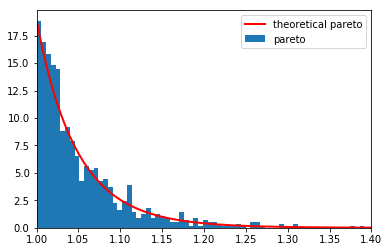

In [13]:
show_plot_for_sample(sample, k)

Рассчитаем дисперсию и математическое ожидание распределения Парето

In [14]:
DX = ((1 / (k - 1)) ** 2) * (k / (k - 2))
print('DX = {0}'.format(DX))
EX = k / (k - 1)
print('EX = {0}'.format(EX))

DX = 0.00307787011388
EX = 1.05263157895


Объявим функцию принимающую на вход массив средних значений распределения Парето, дисперсию и мат. ожидание и рисующую гистограмму и нормальное распределение

In [60]:
def show_plot_for_sample_normal(sample, DX, EX, n):
    plt.hist(sample, 50, normed=True, label='pareto')
    
    DX_n = np.sqrt(DX/n)
    
    xmin = np.min(sample)
    xmax = np.max(sample)
    
    x = np.linspace(xmin, xmax, 100)
    
    norm_rv = sts.norm(EX, DX_n)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
    
    plt.legend()
    
    plt.title('Number of elements n={0}, mu={1}, sigma={2}'.format(n, EX, DX_n))

    plt.xlim(xmin=xmin, xmax=xmax)
    
    plt.xlabel('x')
    plt.ylabel('f(x)')

    plt.show()

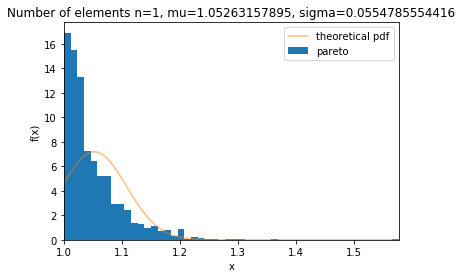

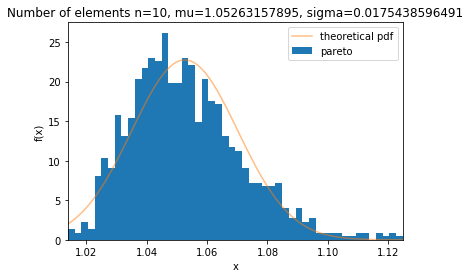

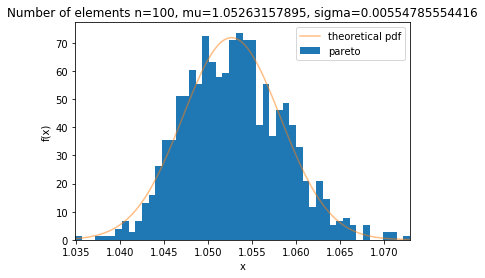

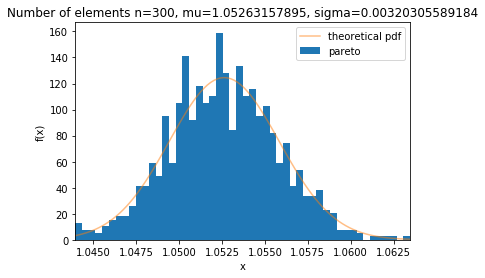

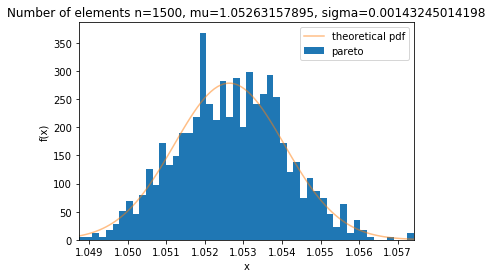

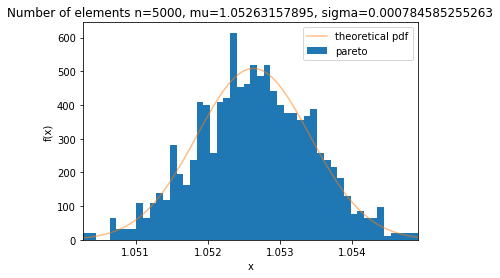

In [61]:
for n in [1, 10, 100, 300, 1500, 5000]:
    avg_value = []
    for i in range(1000):
        avg = np.average(pareto.rvs(n))
        avg_value.append(avg)
    show_plot_for_sample_normal(sample=avg_value, DX=DX, EX=EX, n=n)

## Выводы

1. С увеличением n выборка становится более узкой и сконцетрированной вокруг среднего занчения 1.053.
2. При n=1 и количестве выборок 1000, гистограмма совпадает с гистограммой полученой при n=1000 и количеством выборок 1.
3. Так как распределение Парето несимметрично, то к нормальному оно сходится только про больших n, например больше 100.
